In [ ]:
%pip install numpy matplotlib scipy

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, pi

In [22]:
k = 1 / (4 * pi * epsilon_0)

In [23]:
def electric_field(q, xq, yq, x, y):
    """ Calcula el campo electrico en los puntos (x, y) debido a las cargas q en (xq, yq) """
    Ex, Ey = np.zeros_like(x), np.zeros_like(y)
    
    for qi, xqi, yqi in zip(q, xq, yq):
        dx = x - xqi
        dy = y - yqi
        r3 = (dx**2 + dy**2)**1.5
        Ex += qi * dx / r3
        Ey += qi * dy / r3

    Ex *= k
    Ey *= k
    return Ex, Ey

In [39]:
def potential(q, xq, yq, x, y):
    """ Calcula el potencial electrico en los puntos (x, y) debido a las cargas q en (xq, yq) """
    V = np.zeros_like(x)
    
    for qi, xqi, yqi in zip(q, xq, yq):
        dx = x - xqi
        dy = y - yqi
        r = np.sqrt(dx**2 + dy**2)
        V += qi / r

    V *= k
    return V

In [41]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
x_axis_X, x_axis_Y = np.meshgrid(x, [.0])

q = [1e-6, 2e-6, -3e-6]
xq = [-5, 0, 5]
yq = [0, 0, 0]

Ex, Ey = electric_field(q, xq, yq, X, Y)
V = potential(q, xq, yq, X, Y)

Ex1, _ = electric_field([q[0]], [xq[0]], [yq[0]], x_axis_X, x_axis_Y)
Ex2, _ = electric_field([q[1]], [xq[1]], [yq[1]], x_axis_X, x_axis_Y)
Ex3, _ = electric_field([q[2]], [xq[2]], [yq[2]], x_axis_X, x_axis_Y)
x_axis_Ex = Ex1 + Ex2 + Ex3

V1 = potential([q[0]], [xq[0]], [yq[0]], x_axis_X, x_axis_Y)
V2 = potential([q[1]], [xq[1]], [yq[1]], x_axis_X, x_axis_Y)
V3 = potential([q[2]], [xq[2]], [yq[2]], x_axis_X, x_axis_Y)
x_axis_V = V1 + V2 + V3

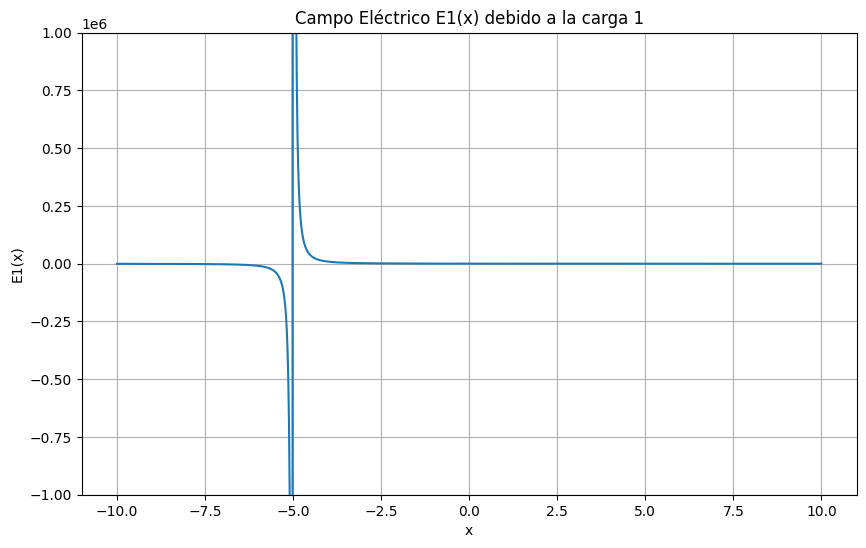

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x, Ex1[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('E1(x)')
plt.title('Campo Eléctrico E1(x) debido a la carga 1')
plt.grid()
plt.show()

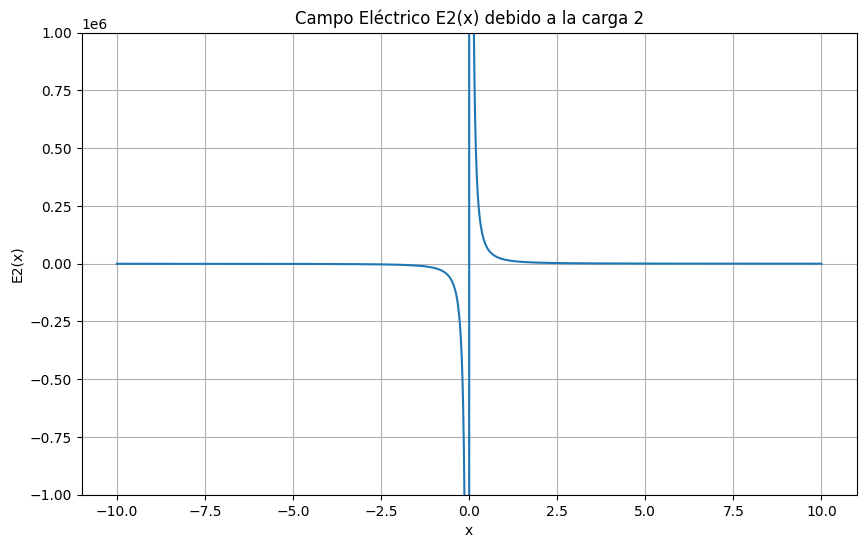

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x, Ex2[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('E2(x)')
plt.title('Campo Eléctrico E2(x) debido a la carga 2')
plt.grid()
plt.show()

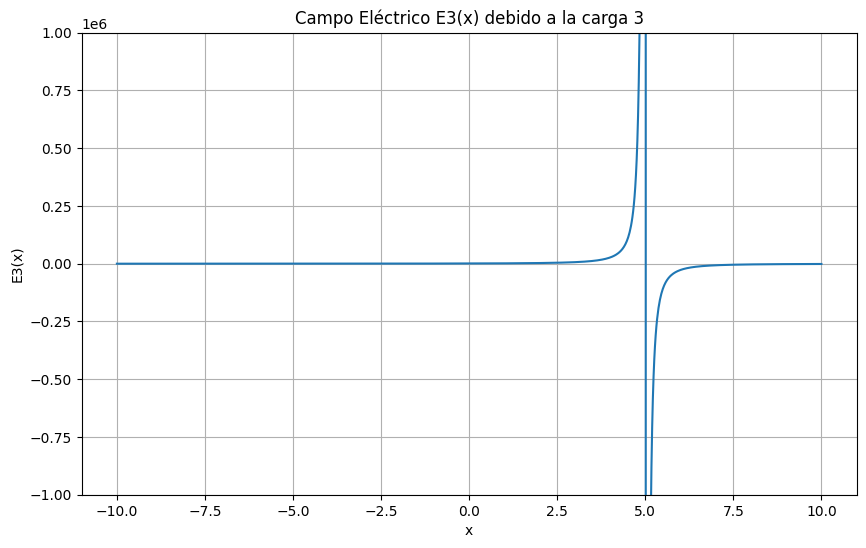

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(x, Ex3[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('E3(x)')
plt.title('Campo Eléctrico E3(x) debido a la carga 3')
plt.grid()
plt.show()

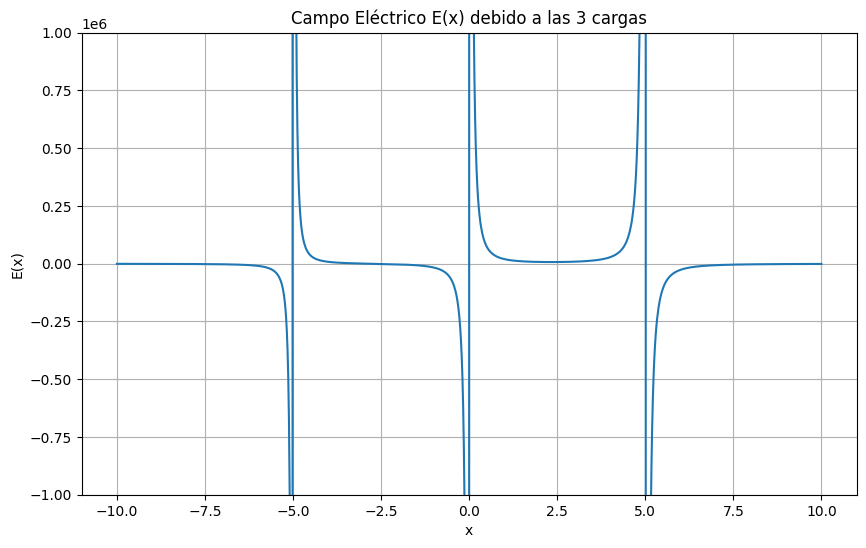

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(x, x_axis_Ex[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.title('Campo Eléctrico E(x) debido a las 3 cargas')
plt.grid()
plt.show()

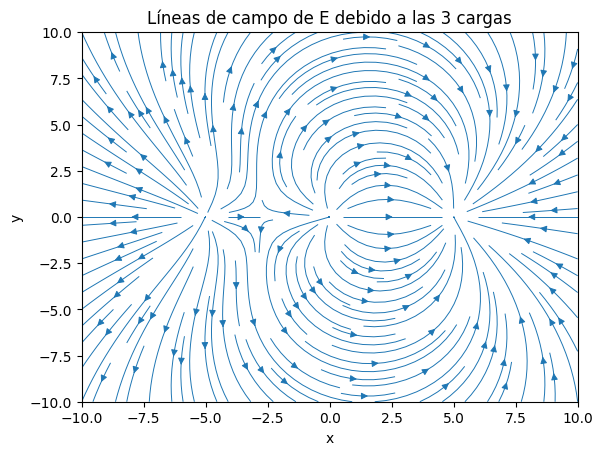

In [110]:
plt.Figure(figsize=(10, 6))
plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=0.7)
plt.title("Líneas de campo de E debido a las 3 cargas")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

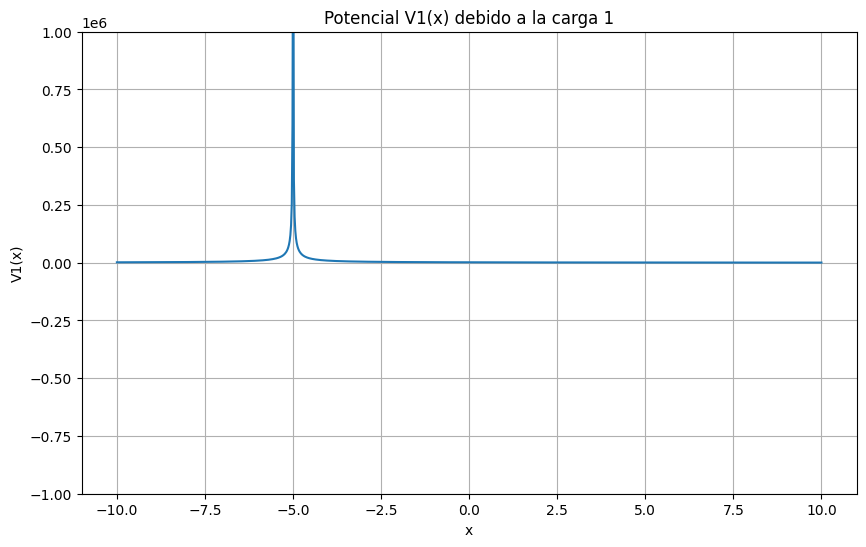

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(x, V1[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('V1(x)')
plt.title('Potencial V1(x) debido a la carga 1')
plt.grid()
plt.show()

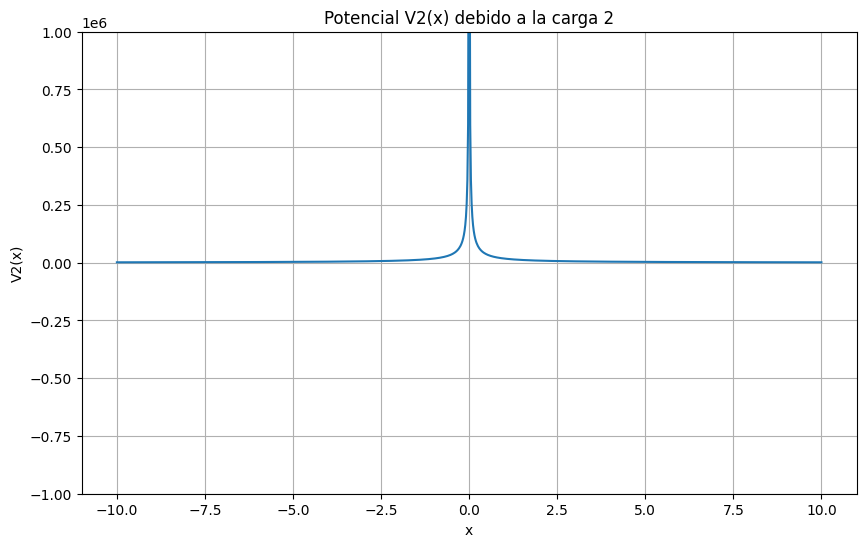

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(x, V2[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('V2(x)')
plt.title('Potencial V2(x) debido a la carga 2')
plt.grid()
plt.show()

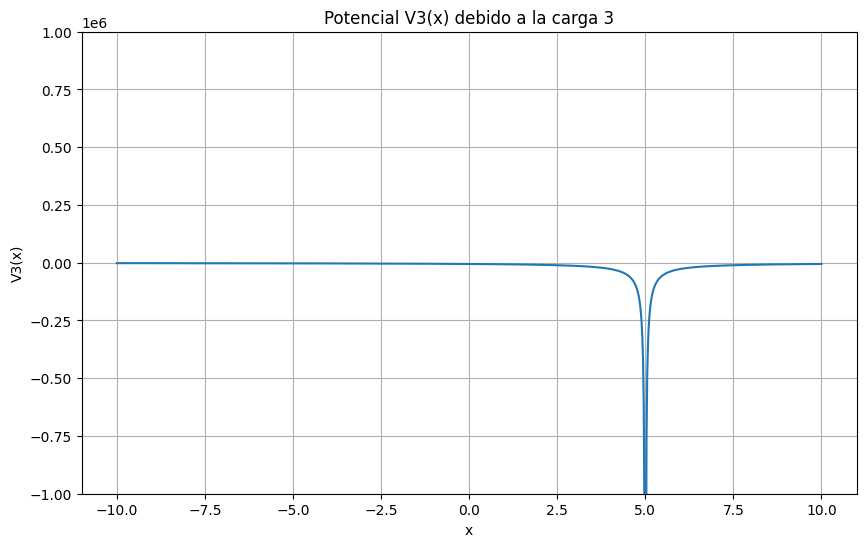

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(x, V3[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('V3(x)')
plt.title('Potencial V3(x) debido a la carga 3')
plt.grid()
plt.show()

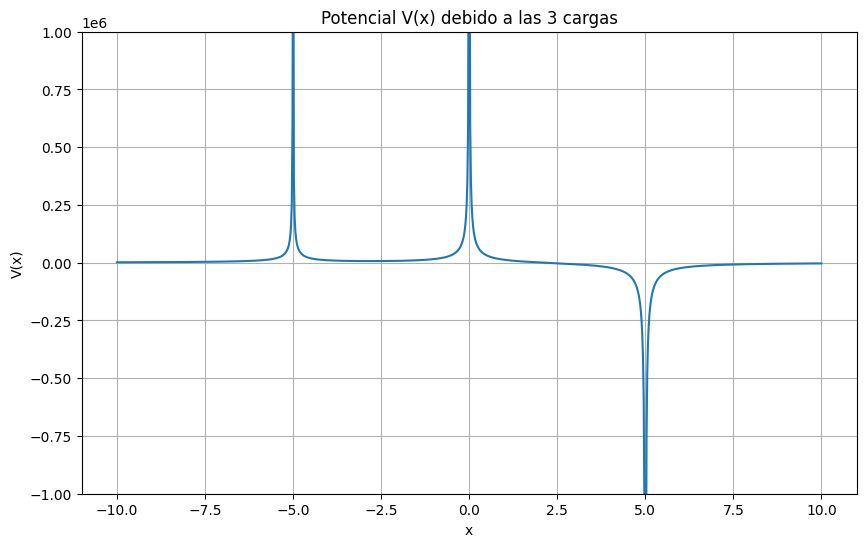

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(x, x_axis_V[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Potencial V(x) debido a las 3 cargas')
plt.grid()
plt.show()

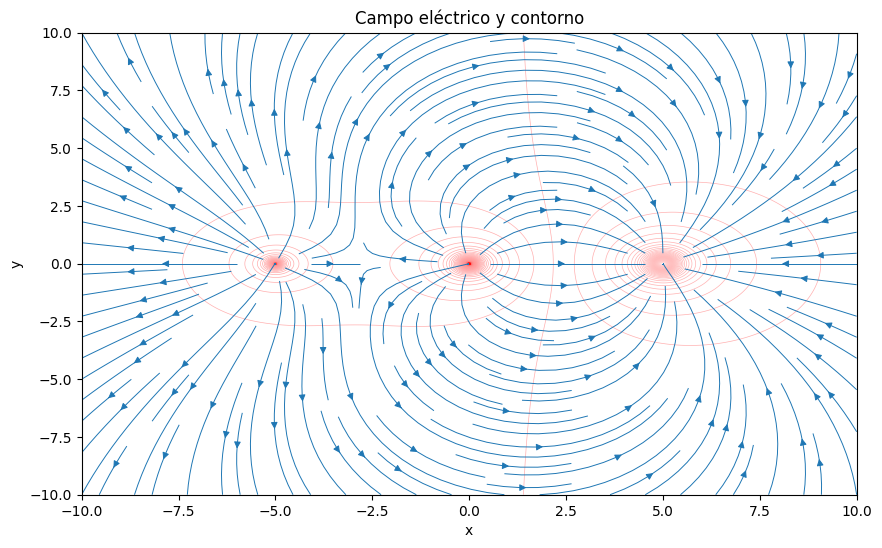

In [109]:
plt.figure(figsize=(10, 6))
plt.contour(X, Y, V, levels=1000, linewidths=0.5, cmap='bwr')
plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=0.7)
plt.title("Campo eléctrico y contorno")
plt.xlabel("x")
plt.ylabel("y")
plt.show()